1) BFS

In [71]:
import queue
import threading

class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]

    def addEdge(self, u, v):
        self.adj[u].append(v)
        self.adj[v].append(u)

    def BFS(self, start):
        q = queue.Queue()
        visited = [False] * self.V
        visited[start] = True
        q.put(start)
        while not q.empty():
            u = q.get()
            print(u, end=" ")
            for v in self.adj[u]:
                if not visited[v]:
                    visited[v] = True
                    q.put(v)

def main():
    g = Graph(7)
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 3)
    g.addEdge(1, 4)
    g.addEdge(2, 5)
    g.addEdge(2, 6)
    print("Breadth First Search: ", end="")
    g.BFS(0)

if __name__ == "__main__":
    main()

Breadth First Search: 0 1 2 3 4 5 6 

DFS

In [73]:
def bubble_sort(array):
  """Sorts the given array using the bubble sort algorithm.

  Args:
    array: The array to sort.

  Returns:
    A sorted copy of the given array.
  """

  n = len(array)
  for i in range(n):
    for j in range(0, n - i - 1):
      if array[j] > array[j + 1]:
        array[j], array[j + 1] = array[j + 1], array[j]

  return array


def main():
  """The main function."""

  # Get the input from the user
  n = int(input("Enter the number of elements: "))
  array = []
  for i in range(n):
    array.append(int(input("Enter element {}: ".format(i + 1))))

  # Sort the array
  sorted_array = bubble_sort(array)

  # Print the sorted array
  print("The sorted array is:")
  for element in sorted_array:
    print(element)


if __name__ == "__main__":
  main()


Enter the number of elements: 3
Enter element 1: 54
Enter element 2: 26
Enter element 3: 35
The sorted array is:
26
35
54


2) Bubble sort

In [74]:
def bubble(a, n):
    for i in range(n):
        first = i % 2
        for j in range(first, n - 1, 2):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]

def main():
    n = int(input("\n enter total no of elements => "))
    a = []
    print("\n enter elements => ")
    for _ in range(n):
        element = int(input())
        a.append(element)
    
    bubble(a, n)
    
    print("\n sorted array is => ")
    for element in a:
        print(element)
    
    return 0

if __name__ == "__main__":
    main()


 enter total no of elements => 4

 enter elements => 
23
20
45
26

 sorted array is => 
20
23
26
45


3) Max Min and Avg operations using ||el reduction


In [75]:
import sys
import numpy as np

def max_reduction(arr):
    max_value = -sys.maxsize
    for i in arr:
        if i > max_value:
            max_value = i
    print("Maximum value:", max_value)


def average_reduction(arr):
    sum = 0
    for i in arr:
        sum += i
    print("Average:", sum / (len(arr) - 1))

def main():
    n = int(input("\n enter total no of elements => "))
    arr = np.zeros(n, dtype=int)
    print("\n enter elements => ")
    for i in range(n):
        arr[i] = int(input())

    max_reduction(arr)
    average_reduction(arr)

if __name__ == "__main__":
    main()



 enter total no of elements => 4

 enter elements => 
23
34
19
46
Maximum value: 46
Average: 40.666666666666664


3) Max and Sum ||el reduction

In [96]:
import sys
import numpy as np
import multiprocessing as mp

def max_reduction(arr):
    max_value = -sys.maxsize
    for i in arr:
        if i > max_value:
            max_value = i
    print("Maximum value:", max_value)

def min_reduction(arr):
    min_value = sys.maxsize
    for i in arr:
        if i < min_value:
            min_value = i
    print("Minimum value:", min_value)

def sum_reduction(arr):
    total_sum = 0
    for i in arr:
        total_sum += i
    print("Sum:", total_sum)

if __name__ == '__main__':
    n = int(input("\nEnter total number of elements: "))
    arr = []
    print("\nEnter elements:")
    for i in range(n):
        arr.append(int(input()))
    max_reduction(arr)
    min_reduction(arr)
    sum_reduction(arr)


Enter total number of elements: 3

Enter elements:
12
56
23
Maximum value: 56
Minimum value: 12
Sum: 91


CUDA Matrix operations




In [5]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  accountsservice acl apg apport apport-symptoms aptdaemon aptdaemon-data
  aspell aspell-en at-spi2-core avahi-daemon avahi-utils bind9-host bind9-libs
  bluez bolt bubblewrap cheese-common colord colord-data cracklib-runtime crda
  cuda-12-1 cuda-cccl-12-1 cuda-command-line-tools-12-1 cuda-compiler-12-1
  cuda-cudart-12-1 cuda-cudart-dev-12-1 cuda-cuobjdump-12-1 cuda-cupti-12-1
  cuda-cupti-dev-12-1 cuda-cuxxfilt-12-1 cuda-demo-suite-12-1
  cuda-documentation-12-1 cuda-driver-dev-12-1 cuda-drivers cuda-drivers-530
  cuda-gdb-12-1 cuda-libraries-12-1 cuda-libraries-dev-12-1 cuda-nsight-12-1
  cuda-nsight-compute-12-1 cuda-nsight-systems-12-1 cuda-nvcc-12-1
  cuda-nvdisasm-12-1 cuda-nvml-dev-12-1 cuda-nvprof-12-1 cuda-nvprune-12-1
  cuda-nvrtc-12-1 cuda-nvrtc-dev-12-1 cuda-nvtx-12-1 cuda-nvvp-12-1
  cuda-opencl-12-1 cuda-opencl-dev-12-1 cu

In [68]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from numba import cuda

# CUDA kernel to perform vector addition
@cuda.jit
def vector_addition(a, b, result):
    idx = cuda.threadIdx.x + cuda.blockDim.x * cuda.blockIdx.x
    if idx < len(a):
        result[idx] = a[idx] + b[idx]

# User input for vector length
vector_length = int(input("Enter the length of the vectors: "))

# User input for vector elements
vector_a = np.zeros(vector_length, dtype=np.float32)
vector_b = np.zeros(vector_length, dtype=np.float32)
for i in range(vector_length):
    vector_a[i] = float(input("Enter the element of vector a at index {}: ".format(i)))
    vector_b[i] = float(input("Enter the element of vector b at index {}: ".format(i)))

# Allocate memory on the GPU
device_vector_a = cuda.to_device(vector_a)
device_vector_b = cuda.to_device(vector_b)
device_result = cuda.device_array_like(vector_a)

# Define the number of threads per block and the number of blocks
threads_per_block = 32
blocks_per_grid = (vector_length + (threads_per_block - 1)) // threads_per_block

# Launch the kernel
vector_addition[blocks_per_grid, threads_per_block](device_vector_a, device_vector_b, device_result)

# Copy the result back to the CPU
result = device_result.copy_to_host()

# Print the result
print("Result:", result)

     

Boston House price Prediction

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [102]:
# Load the Boston Housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [104]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 558.2283 - val_loss: 607.7020
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 520.5197 - val_loss: 565.7082
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 476.3465 - val_loss: 511.3374
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 418.8331 - val_loss: 437.9577
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 341.4434 - val_loss: 342.0468
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 246.8829 - val_loss: 235.3450
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 159.3668 - val_loss: 143.1212
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 93.9824 - val_loss: 89.4058
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 66.1942 - val_loss: 65.8046
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 52

In [105]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

4/4 [==============================] - 0s 4ms/step
Mean Squared Error: 25.054890221927856


IMDB Movie Reviews

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
     

In [107]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
print(f'train dataset size: {len(x_train)}')
print(f'test dataset size: {len(x_test)}')
     

train dataset size: 25000
test dataset size: 25000


In [108]:
max_len =250
x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)
print(f'train size: {x_train.shape}')
print(f'test size: {x_test.shape}')
     

train size: (25000, 250)
test size: (25000, 250)


In [109]:

model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_len))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1,activation='sigmoid'))
model.summary()
     

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 250, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,420,097
Trainable params: 1,420,097
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
history = model.fit(x_train,y_train,epochs=3,batch_size=150,validation_split=0.2)
     

Epoch 1/3
134/134 [==============================] - 36s 207ms/step - loss: 0.4256 - accuracy: 0.7915 - val_loss: 0.3198 - val_accuracy: 0.8660
Epoch 2/3
134/134 [==============================] - 22s 162ms/step - loss: 0.2147 - accuracy: 0.9194 - val_loss: 0.3025 - val_accuracy: 0.8866
Epoch 3/3
134/134 [==============================] - 16s 117ms/step - loss: 0.1383 - accuracy: 0.9528 - val_loss: 0.3696 - val_accuracy: 0.8742


In [112]:
loss,acc=model.evaluate(x_test,y_test,batch_size=64)
print(f"test Accuracy: {acc:4f},test loss: {loss:4f}")

391/391 [==============================] - 6s 14ms/step - loss: 0.3912 - accuracy: 0.8676
test Accuracy: 0.867600,test loss: 0.391171


Fashion Dataset

In [113]:
import tensorflow as tf
!pip install keras
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [115]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [116]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense (128, activation='relu'), keras.layers.Dense (10, activation='softmax') ])

In [117]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
     

In [118]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4988 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3743 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3376 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3158 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2701 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2491 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [119]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.8804
Test accuracy: 0.8804000020027161


In [120]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


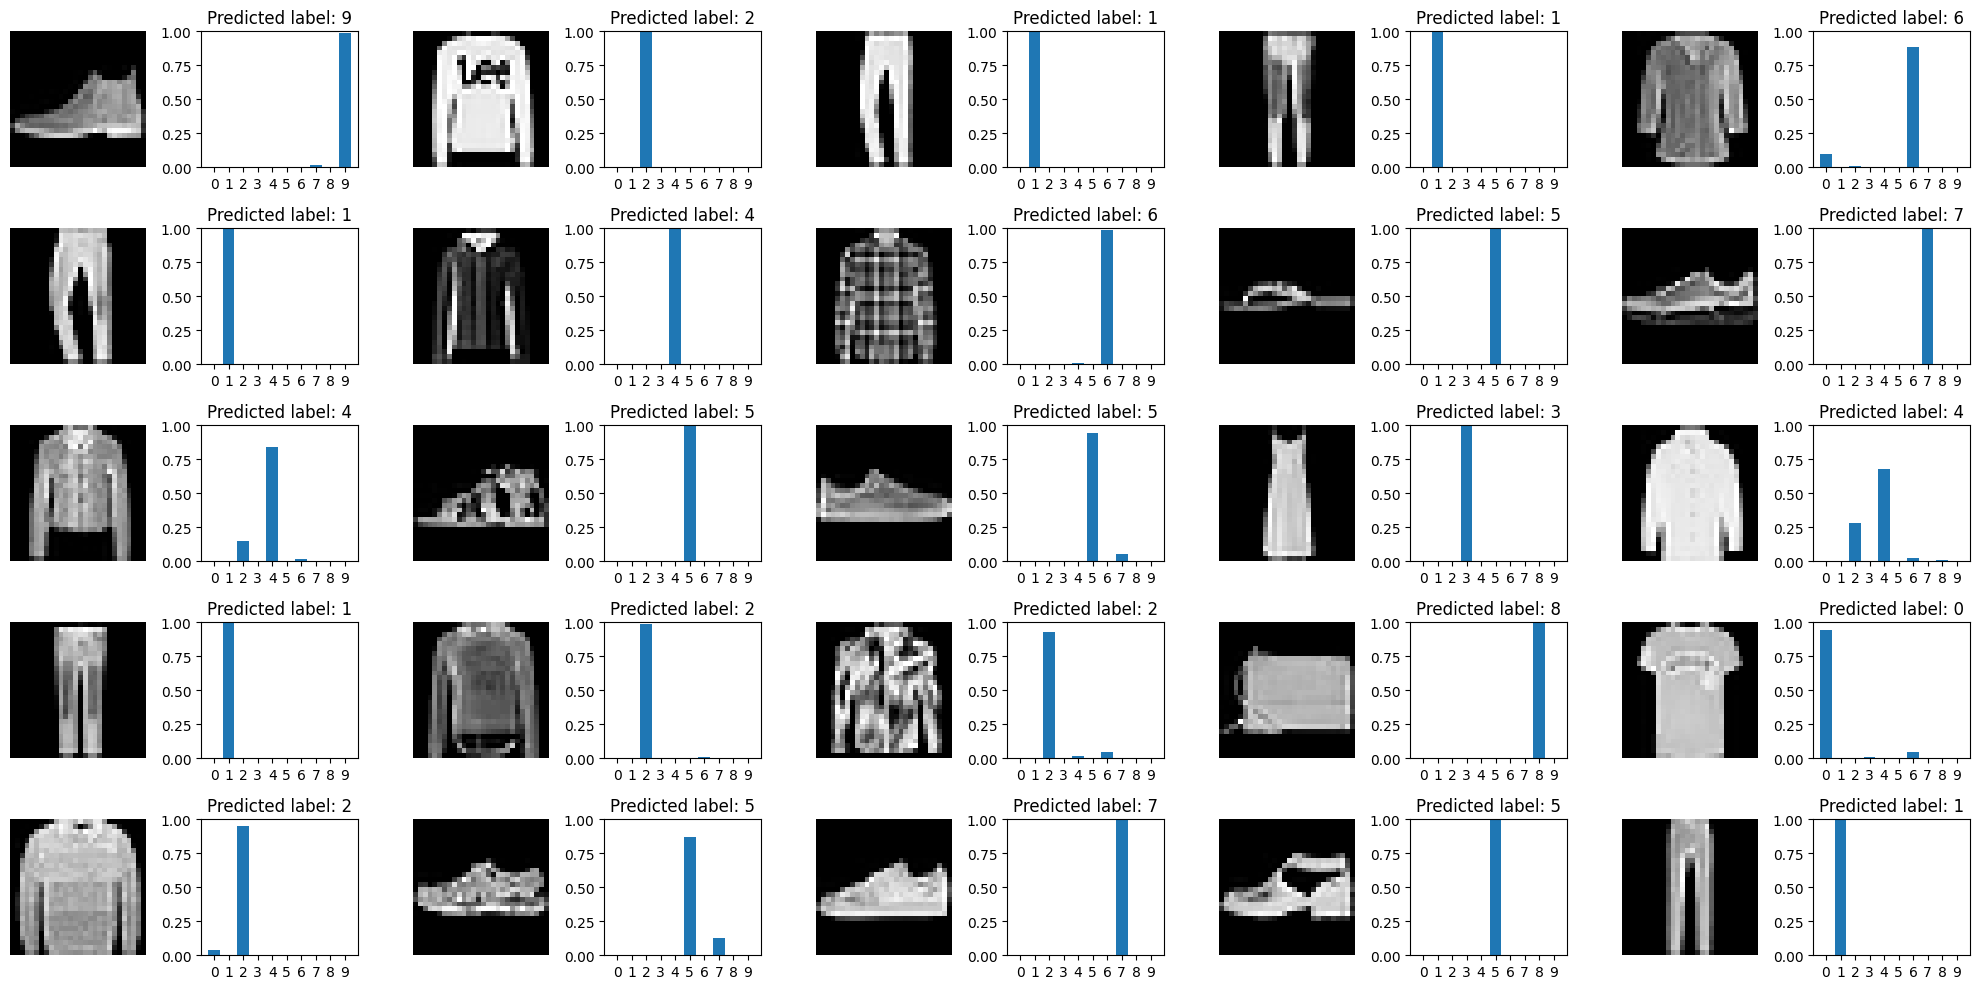

In [121]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1) 
  plt.imshow(test_images[i], cmap='gray')
  plt.axis('off')
  plt.subplot(num_rows, 2 * num_cols, 2* i + 2)
  plt.bar(range(10), predictions[i])
  plt.xticks(range(10)) 
  plt.ylim([0, 1])
  plt.tight_layout()
  plt.title(f"Predicted label: {predicted_labels[i]}")
plt.show()